# Systeme von gewöhnlichen Differentialgleichungen - Vorlesung

**Themenüberblick:**

- Matrixformulierung
- Geschwindigkeitsvektorfeld im Phasenraum
- Exponentiallösung
- Lösung mittels Eigenwerten und -vektoren
- Anwendungen: Elektrotechnik, Umschreiben von GDGL zweiter Ordnung, Mechanik, Wärmetauscher, gekoppelte Schwingungen

**zusätzliche Unterlagen:** `16_Differentialgleichungen_Teil_2-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Homogenes Beispiel: freie Schwingung

**Umformulierung von GDGL 2-ter Ordnung auf ein GDGL System**

Die GDGL 2-ter Ordnung $\ddot{y} + \frac{d}{m}\dot{y} + \frac{k}{m}y = 0$ der gedämpften harmonischen Schwingung aus der Mechanik läßt sich mit der neuen Größe $v(t):=\dot{y}(t)$ (Geschwindigkeit) in das folgende System von zwei GDGL umschreiben:

$$\begin{pmatrix} \dot{y}(t) \\ \dot{v}(t) \end{pmatrix} = 
\begin{pmatrix} 0 & 1 \\ -\frac{k}{m} & -\frac{d}{m} \end{pmatrix} 
\begin{pmatrix} y(t) \\ v(t) \end{pmatrix}$$

Oder kürzer in Matrixnotation:

$$\dot{x}(t) = Ax(t)$$

mit der konstanten quadratische Matrix $A=\begin{pmatrix} 0 & 1 \\ -\frac{k}{m} & -\frac{d}{m} \end{pmatrix}$.
Dabei bezeichnet $x(t)=\begin{pmatrix} y(t) \\ v(t) \end{pmatrix}$ den Zustand(svektor) zum Zeitpunkt $t$.

Physikalische Interpretation: Bewegung im Zustandsraum (Ort-Geschwindigkeits-Diagramm)

In [2]:
# Beispielparameterwerte:
m = 2
d = 0.25
k = 4

Graphische Darstellung des GDLG Systems als Vektorfeld:

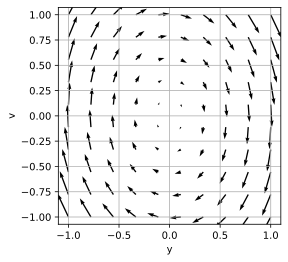

In [3]:
y = linspace(-1, 1, 10)
v = linspace(-1, 1, 10)
y_, v_ = meshgrid(y, v)

figure(figsize=(4,4))
quiver(y_, v_, v_, -k/m*y_ - d/m*v_, scale=20)
axis('equal')
xlabel('y')
ylabel('v')
grid(True)

Lösungen sind Integralkurven, die den Vektoren tangential folgen.

## Theorie der GDGL Systeme

**Allgemeine Struktur:** Es wird eine Kurve $x(t)=\begin{pmatrix} x_1(t) \\ \vdots \\ x_n(t) \end{pmatrix}\in\mathbb{R}^n$ gesucht, die das GDLG System

$$\begin{align}
\dot{x}(t) &= f(x(t),t) \\
    x(0)   &= x_0
\end{align}$$

für eine gegebene Funktion (zeitabhängiges Vektorfeld) $f(x,t)\in\mathbb{R}^n$ und eine Anfangsbedingung $x(0)=x_0$ erfüllt.
In Komponenten lautet das GDLG System:

$$\begin{align}
\dot{x}_1(t) &= f_1(x(t),t), \quad x_1(0) = x_{0,1} \\
\dot{x}_2(t) &= f_2(x(t),t), \quad x_2(0) = x_{0,2} \\
\vdots       &= \vdots     , \quad \vdots           \\
\dot{x}_n(t) &= f_n(x(t),t), \quad x_n(0) = x_{0,n}
\end{align}$$

**Geometrie:** graphische Darstellung des GDLG Systems als Vektorfeld. Lösungen sind Integralkurven, die den Vektoren tangential folgen.


**Lineare (in)homogene Systeme** haben die allgemeine Struktur 

$$\dot{x}(t) = Ax(t) + b(t)$$

mit einer konstanten quadratische Matrix A.
Die allgemeine Lösung $x(t)$ ist Summe aus einer partikulären Lösung $x_p(t)$ und der allgemeinen Lösung $x_h(t)$ der homogenen Gleichung $\dot{x}(t) = Ax(t)$, also 

$$x(t) = x_p(t) + x_h(t).$$

*Hinweis:* Ansätze für eine partikuläre Lösung findet man für unterschiedliche Typen von Inhomogenitäten $b(t)$ in der Literatur.

**Lösung des homogenen GDGL Systems $\dot{x}(t) = Ax(t)$ mittels Eigenwerten und Eigenvektoren:**

Wir schreiben das GDGL System $\dot{x}(t)=Ax(t)$ in der Eigenbasis von $A$, d. h. in den Koordinaten der Eigenvektoren $v_1$ bis $v_n$ von $A$:

$$\begin{align}
x(t)       &= c_1(t) v_1 + \ldots + c_n(t) v_n. \quad\text{Daraus folgt} \\
\dot{x}(t) &= \dot{c}_1(t) v_1 + \ldots + \dot{c}_n(t) v_n. \\
Ax(t)      &= A \left[c_1(t) v_1 + \ldots + c_n(t) v_n \right] \\
           &= c_1(t) A v_1 + \ldots + c_n(t) A v_n \\
           &= c_1(t) \lambda_1 v_1 + \ldots + c_n(t) \lambda_n v_n.
\end{align}$$

Einsetzen in das GDGL System $\dot{x}(t)=Ax(t)$ liefert

$$\dot{c}_1(t) v_1 + \ldots + \dot{c}_n(t) v_n = c_1(t) \lambda_1 v_1 + \ldots + c_n(t) \lambda_n v_n.$$

Die Komponenten der Eigenvektoren links und rechts müssen übereinstimmen, da die Eigenvektoren linear unabhängig sind. Daraus ergeben sich $n$ entkoppelte GDGL erster Ordnung mit konstanten Koeffizienten:

$$\begin{align}
\dot{c}_1(t) &= \lambda_1 c_1(t)  \\
      \vdots &= \vdots \\
\dot{c}_n(t) &= \lambda_n c_n(t) 
\end{align}$$

Diese haben die Lösungen

$$c_i(t) = c_i(0)e^{\lambda_i t}\quad\text{für } i = 1,\ldots,n.$$

Die Anfangswerte $c_1(0)$ bis $c_n(0)$ bestimmen wir aus dem linearen Gleichungssystem

$$x_0 = x(0)= c_1(0) v_1 + \ldots + c_n(0) v_n = V\, c(0),$$

also 

$$Vc(0) = x_0,$$

wobei $V$ die Matrix der Eigenvektoren in Spalten und $c(0)$ der Spaltenvektor der Anfangswerte ist.
Somit lautet die allgemeine Lösung des homogenen Systems

$$x_h(t) = c_1(0) e^{\lambda_1 t} v_1 + \ldots c_n(0) e^{\lambda_n t} v_n.$$ 

*Hinweis:* Falls zwei (oder mehrere) Eigenwerte von $A$ übereinstimmen, gibt es Ansätze, die zu zusätzlichen Fundamentallösungen führen können. Mehr zu diesem Fall in der Literatur.

**Lösung des inhomogenen GDGL Systems $\dot{x}(t) = Ax(t) + b(t)$ mittels Eigenwerten und Eigenvektoren:** 

Wir schreiben das (der Einfachheit halber 2-dimensionale) GDGL System $\dot{x}(t)=Ax(t) + b(t)$ in der Eigenbasis von $A$, d. h. in den Koordinaten der Eigenvektoren $v_1$ und $v_2$:

$$\begin{align}
x(t)       &= c_1(t) v_1 + c_2(t) v_2. \quad\text{Daraus folgt} \\
\dot{x}(t) &= \dot{c}_1(t) v_1 + \dot{c}_2(t) v_2. \\
Ax(t)      &= A \left[c_1(t) v_1 + c_2(t) _2 \right] \\
           &= c_1(t) A v_1 + c_2(t) A v_2 \\
           &= c_1(t) \lambda_1 v_1 + c_2(t) \lambda_2 v_2. \\
b(t)       &= d_1(t) v_1 + d_2(t) v_2.
\end{align}$$

Einsetzen in das GDGL System $\dot{x}(t)=Ax(t) + b(t)$ liefert

$$\begin{align}
\dot{c}_1(t) v_1 + \dot{c}_2(t) v_2 &= c_1(t) \lambda_1 v_1 + c_2(t) \lambda_2 v_2 + d_1(t) v_1 + d_2(t) v_2\\
&= [c_1(t) \lambda_1 + d_1(t)] v_1 + [c_2(t) \lambda_2 + d_2(t)] v_2
\end{align}$$

Die Komponenten der Eigenvektoren links und rechts müssen wiederum übereinstimmen. Daraus ergeben sich zwei entkoppelte GDGL erster Ordnung:

$$\begin{align}
\dot{c}_1(t) &= \lambda_1 c_1(t) + d_1(t) \\
\dot{c}_2(t) &= \lambda_2 c_2(t) + d_2(t)
\end{align}$$

Diese lassen sich einzeln mit den bekannten Methoden für lineare GDGL erster Ordnung lösen. 
Die Anfangswerte $c_1(0)$ und $c_2(0)$ bestimmen wir wieder aus dem linearen Gleichungssystem 

$$x_0 = x(0)= c_1(0) V_1 + c_2(0) V_2 = V\, c(0),$$

also

$$V c(0) = x_0.$$

**Lösung des inhomogenen GDGL Systems $\dot{x}(t) = Ax(t) + b(t)$ mittels Matrixexponential:**

Das Matrixexponential ist definiert über die Exponentialreihe: 

$$e^A = \sum_{n=0}^\infty \frac{1}{n!}A^n = I + A + \frac{1}{2}A^2 + \frac{1}{6}A^3 + \ldots.$$

Das GDGL System $\dot{x}(t) = Ax(t) + b(t)$ hat die Lösung 

$$x(t) = e^{At} \left[ \int_0^t e^{-A\tau}b(\tau)d\tau + x_0 \right].$$

Wenn man z. B. den Anfangswert $x_0$ in die Basis der Eigenvektoren $v_i$ zerlegt, also $x_0 = c_1(0) v _1 + \ldots +  c_n(0) v_n,$ dann wird die allgemeine Lösung der homogenen Gleichung wieder zu $x_h(t) = e^{At}x_0 = c_1(0) e^{\lambda_1 t} v_1 + \ldots c_n(0) e^{\lambda_n t} v_n.$

**Freie Schwingung: Lösung mittels Matrix-Exponential $x(t) = e^{At}x_0$, da $b(t)=0$.**

In [4]:
from scipy.linalg import expm

In [5]:
t = linspace(0, 10, num=1000)
A = array([[   0,    1],
           [-k/m, -d/m]])
x0 = array([[0.0],
            [0.9]])
x = zeros((2,len(t)))
for i in range(len(t)):
    x[:,[i]] = dot(expm(A*t[i]), x0)

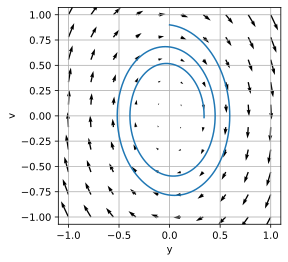

In [6]:
figure(figsize=(4,4))
quiver(y_, v_, v_, -k/m*y_ - d/m*v_, scale=30)
plot(x[0,:], x[1,:])
axis('equal')
xlabel('y')
ylabel('v')
grid(True)

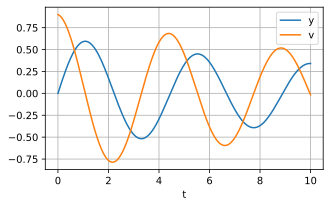

In [7]:
figure(figsize=(5,3)) 
plot(t, x[0,:], label='y')
plot(t, x[1,:], label='v')
legend()
xlabel('t')
grid(True)

**Schwingung: Lösung mittels Eigenwerten und Eigenvektoren**

In [8]:
L, V = eig(A)
print("Eigenwerte:\n", L)
print("Eigenvektoren:\n", V)

Eigenwerte:
 [-0.0625+1.41283182j -0.0625-1.41283182j]
Eigenvektoren:
 [[-0.02551552-0.57678617j -0.02551552+0.57678617j]
 [ 0.81649658+0.j          0.81649658-0.j        ]]


In [9]:
c0 = solve(V, x0)
print(c0)

[[0.55113519+0.02438079j]
 [0.55113519-0.02438079j]]


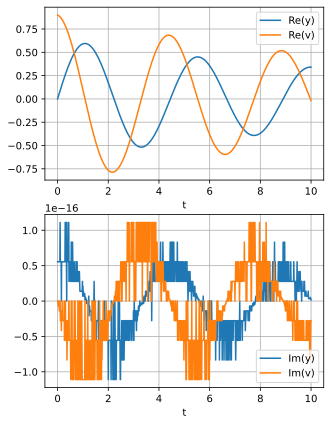

In [10]:
x = c0[0,0]*exp(L[0]*t)*V[:,[0]] + c0[1,0]*exp(L[1]*t)*V[:,[1]]

figure(figsize=(5,7))

subplot(2,1,1) # Realteile
plot(t, real(x[0,:]), label='Re(y)')
plot(t, real(x[1,:]), label='Re(v)')
xlabel('t')
legend(loc='best')
grid(True)

subplot(2,1,2) # Imaginärteile
plot(t, imag(x[0,:]), label='Im(y)')
plot(t, imag(x[1,:]), label='Im(v)')
xlabel('t')
legend(loc='best')
grid(True)

## Inhomogenes Beispiel: elektrischer Schaltkreis

![electric_circuit_system.png](abbildungen/electric_circuit_system.png)

In [12]:
R = 5
L = 2
U = 100
t = linspace(0, 5, num=1000)

A = array([[-R/L,    R/L],
           [ R/L, -2*R/L]])

b = array([[U/L],
           [0]])

x0 = array([[0],
            [0]])
x = zeros((2, len(t)))

**Elektrischer Schaltkreis: Lösung mittels Eigenwerten und Eigenvektoren**

In [13]:
L, V = eig(A)
print(L)
print(V)

[-0.95491503 -6.54508497]
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


In [14]:
d = solve(V, b)
print(d)

[[ 42.53254042]
 [-26.28655561]]


In [15]:
c0 = solve(V, x0)
print(c0)

[[0.]
 [0.]]


Vergleiche die Lösung $y(t)= y(0)e^{-at} + \frac{b}{a}\left( 1 - e^{-at} \right)$ für $\dot{y} + ay = b$ aus der Vorlesung über lineare gewöhnliche Differentialgleichungen 1. Ordnung.

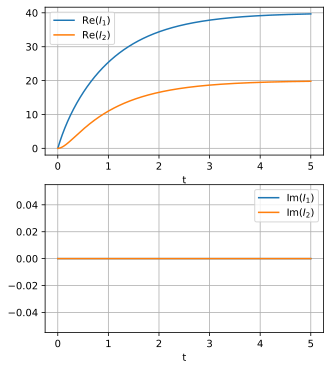

In [16]:
c_t = array([[c0[0,0]*exp(L[0]*t) - d[0,0]/L[0]*(1 - exp(L[0]*t))],
             [c0[1,0]*exp(L[1]*t) - d[1,0]/L[1]*(1 - exp(L[1]*t))]])

x = c_t[0,:]*V[:,[0]] + c_t[1,:]*V[:,[1]]

figure(figsize=(5,6))

subplot(2,1,1) # Realteile
plot(t, real(x[0,:]), label='Re($I_1$)')
plot(t, real(x[1,:]), label='Re($I_2$)')
xlabel('t')
legend()
grid(True)

subplot(2,1,2) # Imaginärteile
plot(t, imag(x[0,:]), label='Im($I_1$)')
plot(t, imag(x[1,:]), label='Im($I_2$)')
xlabel('t')
legend()
grid(True)

## Übungsbeispiele

**Allgemeine freie gedämpfte Schwingung:**

Die GDGL 2-ter Ordnung $\ddot{y} + 2\delta \dot{y} + \omega_0^2 y = 0$ läßt sich mit der neuen Größe $v=\dot{y}$ umschreiben in das System

$$\begin{pmatrix} \dot{y}(t) \\ \dot{v}(t) \end{pmatrix} = 
  \begin{pmatrix} v(t) \\ -\omega_0^2 y(t) -2\delta v(t) \end{pmatrix} =
  \begin{pmatrix} 0 & 1 \\ -\omega_0^2 & -2\delta \end{pmatrix} 
  \begin{pmatrix} y(t) \\ v(t) \end{pmatrix}$$

Oder kürzer:

$$\dot{x}(t) =  Ax(t)$$

In [17]:
if False:           # Schwingung: delta < omega_0
    omega_0 = 2.0
    delta   = 0.5
else:               # keine Schwingung: delta > omega_0
    omega_0 = 2.0
    delta   = 2.2

n = 4
t = linspace(0, 2*pi/omega_0*n, num=n*100)
A = array([[          0,        1],
           [-omega_0**2, -2*delta]])
x0 = array([[ 0.5 ],
            [ 0.9 ]])

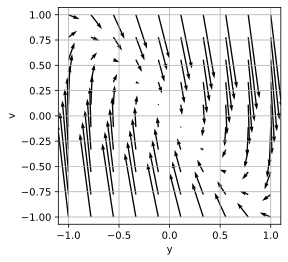

In [18]:
y = linspace(-1, 1, 10)
v = linspace(-1, 1, 10)
y_, v_ = meshgrid(y, v)

figure(figsize=(4,4))
quiver(y_, v_, v_, -omega_0**2*y_ - 2*delta*v_, scale=20)
axis('equal')
xlabel('y')
ylabel('v')
grid(True)

In [19]:
# Lösung via Eigenwerte und Eigenvektoren:

L, V = eig(A)
print("Eigenwerte:\n", L)
print("Eigenvektoren:\n", V)

Eigenwerte:
 [-1.28348486 -3.11651514]
Eigenvektoren:
 [[ 0.61460442 -0.30552813]
 [-0.78883547  0.95218305]]


In [20]:
c0 = solve(V, x0)
print(c0)

[[2.18203677]
 [2.75290346]]


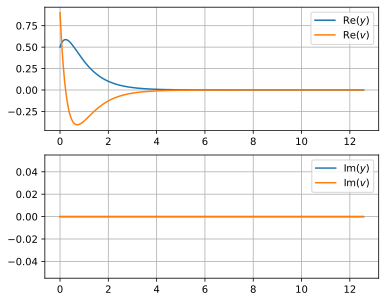

In [21]:
x = c0[0,0]*exp(L[0]*t)*V[:,[0]] + \
    c0[1,0]*exp(L[1]*t)*V[:,[1]]

figure(figsize=(6,5))

subplot(2,1,1) # Realteile
plot(t, real(x[0,:]), label='Re($y$)')
plot(t, real(x[1,:]), label='Re($v$)')
legend()
grid(True)

subplot(2,1,2) # Imaginärteile
plot(t, imag(x[0,:]), label='Im($y$)')
plot(t, imag(x[1,:]), label='Im($v$)')
legend()
grid(True)

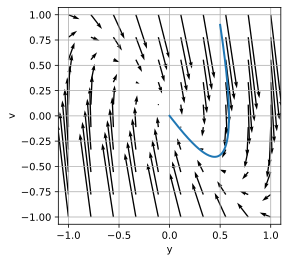

In [22]:
figure(figsize=(4,4))
quiver(y_, v_, v_, -omega_0**2*y_ - 2*delta*v_, scale=20)
plot(real(x[0,:]), real(x[1,:]), linewidth=2)
axis('equal')
xlabel('y')
ylabel('v')
grid(True)

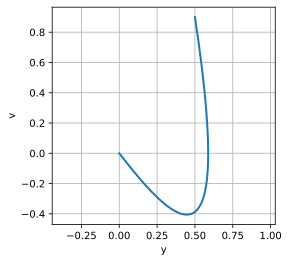

In [23]:
# Lösung via Matrix-Exponential x(t) = e^{At}x(0)

from scipy.linalg import expm

x = zeros((2, len(t)))
for k in range(len(t)):
    x[:,[k]] = dot(expm(A*t[k]), x0)
    
figure(figsize=(4,4))    
plot(x[0,:], x[1,:], linewidth=2)
xlabel('y')
ylabel('v')
axis('equal')
grid(True)

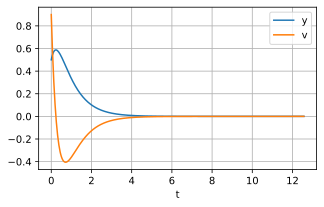

In [24]:
figure(figsize=(5,3)) 
plot(t, x[0,:], label='y')
plot(t, x[1,:], label='v')
xlabel('t')
legend()
grid(True)

**Wärmetauscher:**

MacCluer: Problem p. 137, Exercise 9.4 p. 142

> <------------------- $T_2$ --------------

> ---------------------$T_1$ -------------> 

> <------------------- $T_2$ --------------

> --------------------> $x$ -------------->

- $T_1$ ... Temperatur der inneren Leitung
- $T_2$ ... Temperatur der äußeren Leitung

$$\begin{align}
T_1'(x) &= -k_1(T_1(x) - T_2(x)) \\
T_2'(x) &= -k_2(T_2(x) - T_1(x))
\end{align}$$

- Anfangswerte: $T_1(0) = 290$ K und $T_2(0) = 320$ K
- Koeffizienten: $k_1 > 0$ (Strömung nach rechts) und $k_2 < 0$ (Strömung nach links)

In [25]:
L = 0.3
x = linspace(0, L)
T0= array([[290],
           [320]])
k1 = +1.0
k2 = -2.0
A = array([[-k1,  k1],
           [ k2, -k2]])

print(A)

[[-1.  1.]
 [-2.  2.]]


In [26]:
L, V = eig(A)
print(L)
print(V)

[0. 1.]
[[-0.70710678 -0.4472136 ]
 [-0.70710678 -0.89442719]]


In [27]:
c0 = solve(V, T0)
print(c0)

[[-367.69552622]
 [ -67.08203932]]


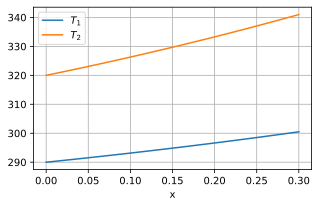

In [28]:
T = c0[0,0]*exp(L[0]*x)*V[:,[0]] + \
    c0[1,0]*exp(L[1]*x)*V[:,[1]]

figure(figsize=(5,3))
plot(x, real(T[0,:]), label='$T_1$')
plot(x, real(T[1,:]), label='$T_2$')
legend(loc='best')
xlabel('x')
grid(True)

**Gekoppeltes Federpendel:**

Ein [gekoppeltes Federpendel](http://de.wikipedia.org/wiki/Gekoppelte_Pendel) wird durch  folgendes System GDGLen 2-ter Ordnung beschrieben:

$$\begin{align}
m \ddot{y_1}(t) &= -ky_1(t) - k (y_1(t) - y_2(t)) \\
m \ddot{y_2}(t) &= -ky_2(t) - k (y_2(t) - y_1(t)) 
\end{align}$$

Literatur: Dietmaier: Mathematik für Angewandte Wissenschaften. Gekoppelte Federpendel p. 464ff

Wir definieren $\omega^2 = \frac{k}{m}$ und schreiben das GDGL System zweiter Ordnung um in ein System 1. Ordnung mit DGL $\dot{x}(t) = Ax(t)$:

$$\begin{align}
x &= \begin{pmatrix} y_1 \\ y_2 \\ \dot{y_1} \\ \dot{y_2} \end{pmatrix} \\
A &= \begin{pmatrix} 0 & 0 & 1 & 0 \\
                    0 & 0 & 0 & 1 \\
                    -2\omega^2 &   \omega^2 & 0 & 0 \\
                      \omega^2 & -2\omega^2 & 0 & 0 \\
    \end{pmatrix}
\end{align}$$

In [29]:
t = linspace(0, 10, num=100)
omega = 2.0
print('omega=', omega)

x0 = array([[0],
            [1],
            [0],
            [0]])
print('x0=\n', x0)

A = array([[          0,           0, 1, 0],
           [          0,           0, 0, 1],
           [-2*omega**2,    omega**2, 0, 0],
           [   omega**2, -2*omega**2, 0, 0]])
print('A=\n', A)

omega= 2.0
x0=
 [[0]
 [1]
 [0]
 [0]]
A=
 [[ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [-8.  4.  0.  0.]
 [ 4. -8.  0.  0.]]


In [30]:
L, V = eig(A)
print(L)
print(V)

[-4.44089210e-17+3.46410162j -4.44089210e-17-3.46410162j
  1.55431223e-16+2.j          1.55431223e-16-2.j        ]
[[-1.50849604e-17-1.96116135e-01j -1.50849604e-17+1.96116135e-01j
  -3.86191682e-17-3.16227766e-01j -3.86191682e-17+3.16227766e-01j]
 [ 4.52548812e-17+1.96116135e-01j  4.52548812e-17-1.96116135e-01j
  -4.56408351e-17-3.16227766e-01j -4.56408351e-17+3.16227766e-01j]
 [ 6.79366220e-01+0.00000000e+00j  6.79366220e-01-0.00000000e+00j
   6.32455532e-01-1.96606674e-16j  6.32455532e-01+1.96606674e-16j]
 [-6.79366220e-01+6.09651416e-17j -6.79366220e-01-6.09651416e-17j
   6.32455532e-01+0.00000000e+00j  6.32455532e-01-0.00000000e+00j]]


In [31]:
c0 = solve(V, x0)
print(c0)

[[-5.71971415e-17-1.27475488j]
 [-5.71971415e-17+1.27475488j]
 [-1.84318757e-16+0.79056942j]
 [-1.84318757e-16-0.79056942j]]


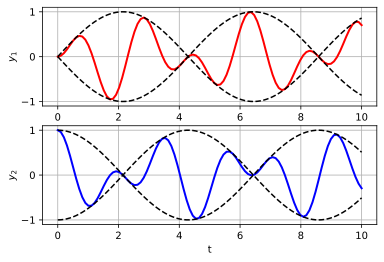

In [32]:
x = c0[0,0]*exp(L[0]*t)*V[:,[0]] + c0[1,0]*exp(L[1]*t)*V[:,[1]] + \
    c0[2,0]*exp(L[2]*t)*V[:,[2]] + c0[3,0]*exp(L[3]*t)*V[:,[3]]

figure(figsize=(6,4))

subplot(2,1,1)
plot(t, real(x[0,:]), color='red', linewidth=2)
if True:
    plot(t,  sin((sqrt(3)-1)/2*omega*t), '--k')
    plot(t, -sin((sqrt(3)-1)/2*omega*t), '--k')
xlabel('t')
ylabel('$y_1$')
grid(True)

subplot(2,1,2) 
plot(t, real(x[1,:]), color='blue', linewidth=2)
if True:
    plot(t,  cos((sqrt(3)-1)/2*omega*t), '--k')
    plot(t, -cos((sqrt(3)-1)/2*omega*t), '--k')
xlabel('t')
ylabel('$y_2$')
grid(True)

Alternativer Plot mit der Zeit als Ordinate:

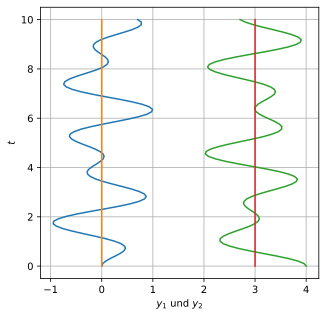

In [33]:
figure(figsize=(5,5))
plot(0 + real(x[0,:]), t)
plot(0*ones(t.shape), t)
plot(3 + real(x[1,:]), t)
plot(3*ones(t.shape), t)
xlabel('$y_1$ und $y_2$')
ylabel('$t$')
grid(True)